## **Important** **packages**

In [ ]:
#Import important packages 
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline

## **Read Data**

In [ ]:
#Load the MCSDataset
!gdown --id 1TN747ThLte9eOABv5fIkdr_4L2kO3AE4

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TN747ThLte9eOABv5fIkdr_4L2kO3AE4
To: /content/MCSDatasetNEXTCONLab.csv
100% 867k/867k [00:00<00:00, 131MB/s]


In [ ]:
df= pd.read_csv('/content/MCSDatasetNEXTCONLab.csv')
df.sample(frac=1  , random_state=2).reset_index(drop=True)
df.head()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1


In [ ]:
#split the training data into xtrain and ytrain
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

1    12587
0     1897
Name: Ligitimacy, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


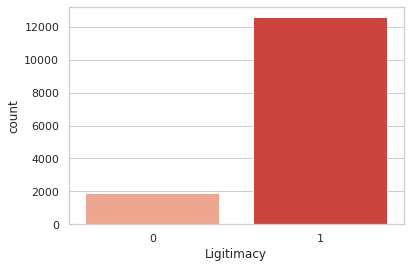

In [ ]:
print(y.value_counts())
sns.set_theme(style="whitegrid")
sns.countplot(y, palette="Reds")

1    12587
0    12587
Name: Ligitimacy, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


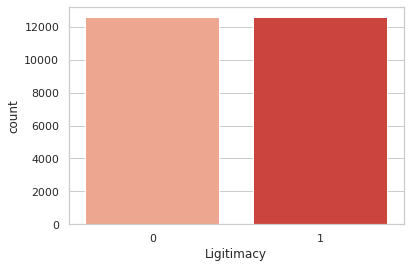

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state= 0)
# fit and apply the transform
X_re, y_re =oversample.fit_resample(x, y)
print(y_re.value_counts())

sns.countplot(y_re, palette="Reds")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_re, y_re ,test_size=0.2, random_state = 2)
print('Training set length: {} Row'.format(len(X_train)))
print('Testing set length: {} Row'.format(len(X_test)))

Training set length: 20139 Row
Testing set length: 5035 Row


## **Classifiers**

**RandomForestClassifier**

In [ ]:
#applaying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 2)
rf.fit(X_train, y_train)
pre_rf =  rf.predict(X_test)
pre_rf_train = rf.predict(X_train)
rf_testing_acc = accuracy_score(y_test, pre_rf)
rf_trianing_acc = accuracy_score(y_train, pre_rf_train)

In [ ]:
print('testing accuracy of Random Forest Classifier: {} %'.format(rf_testing_acc * 100))
print('training accuracy of Random Forest Classifier: {} %'.format(rf_trianing_acc * 100))
print('---------------------------------------------------------------')
print(classification_report(y_test, pre_rf))

testing accuracy of Random Forest Classifier: 99.96027805362463 %
training accuracy of Random Forest Classifier: 100.0 %
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2508
           1       1.00      1.00      1.00      2527

    accuracy                           1.00      5035
   macro avg       1.00      1.00      1.00      5035
weighted avg       1.00      1.00      1.00      5035



**AdaBoostClassifier**

In [ ]:
#applaying AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(n_estimators=100,random_state = 2)
ad.fit(X_train, y_train)
pre_ad = ad.predict(X_test)
pre_ad_train = ad.predict(X_train)
ad_testing_acc = accuracy_score(y_test, pre_ad)
ad_trianing_acc = accuracy_score(y_train, pre_ad_train)

In [ ]:
print('testing accuracy of AdaBoost Classifier: {} %'.format(ad_testing_acc * 100))
print('training accuracy of AdaBoost Classifier: {} %'.format(ad_trianing_acc * 100))
print('---------------------------------------------------------------')
print(classification_report(y_test, pre_ad))

testing accuracy of AdaBoost Classifier: 96.78252234359483 %
training accuracy of AdaBoost Classifier: 96.49932965887085 %
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2508
           1       0.98      0.95      0.97      2527

    accuracy                           0.97      5035
   macro avg       0.97      0.97      0.97      5035
weighted avg       0.97      0.97      0.97      5035



**naive_bayesClassifier**

In [ ]:
#applaying naive_bayesClassifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pre_gnb = gnb.predict(X_test)
pre_gnb_train = gnb.predict(X_train)
gnb_testing_acc = accuracy_score(y_test, pre_gnb)
gnb_trianing_acc = accuracy_score(y_train, pre_gnb_train)

In [ ]:
print('testing accuracy of na¨ıve Bayesian classifier: {} %'.format(gnb_testing_acc * 100))
print('training accuracy of na¨ıve Bayesian classifier: {} %'.format(gnb_trianing_acc * 100))
print('---------------------------------------------------------------')
print(classification_report(y_test, pre_gnb))

testing accuracy of na¨ıve Bayesian classifier: 72.86991062562066 %
training accuracy of na¨ıve Bayesian classifier: 72.20815333432643 %
---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      2508
           1       0.81      0.60      0.69      2527

    accuracy                           0.73      5035
   macro avg       0.75      0.73      0.72      5035
weighted avg       0.75      0.73      0.72      5035



In [ ]:
#all prediction
all = {'pre_rf' : pre_rf, 'pre_ad' : pre_ad,'pre_gnb': pre_gnb}
all =pd.DataFrame.from_dict(all)
all.head()

,pre_rf,pre_ad,pre_gnb
0,1,1,0
1,0,0,0
2,1,1,0
3,1,1,0
4,0,0,0


## **Majority voting-based**

In [ ]:
vote_pre = []
for i in range(len(all)):
  if all.iloc[i,:].sum() < 2 :
    vote_pre.append(0)
  else :
    vote_pre.append(1)

all['Voting Pre'] = vote_pre


voting_acc = accuracy_score(y_test, vote_pre)
print('accuracy of voting Model: {} %'.format(voting_acc * 100))

accuracy of voting Model: 97.73584905660377 %


In [ ]:
all.head()

,pre_rf,pre_ad,pre_gnb,Voting Pre
0,1,1,0,1
1,0,0,0,0
2,1,1,0,1
3,1,1,0,1
4,0,0,0,0


## **Weighted sum aggregation**

In [ ]:
#aggregate all training accuracies 
train_accs = rf_trianing_acc + ad_trianing_acc + gnb_trianing_acc

#get weight for each model
wRF = rf_trianing_acc / train_accs
wAdaboost = ad_trianing_acc / train_accs
wNB = gnb_trianing_acc / train_accs

#Aggregator principle to make decision
Aggregated_output  = (pre_rf * wRF) + (pre_ad * wAdaboost) + (pre_gnb * wNB)

In [ ]:
fram = pd.DataFrame(Aggregated_output)

weighted_pre = []
for i in fram.iloc[:,0]:
  if i > 0.5:
    weighted_pre.append(1)
  else :
    weighted_pre.append(0)

all['Weighted Pre'] = weighted_pre

In [ ]:
weighted_acc = accuracy_score(y_test, weighted_pre)
print('accuracy of Weighted sum aggregation model: {} %'.format(weighted_acc * 100))

accuracy of Weighted sum aggregation model: 97.73584905660377 %


In [ ]:
all.head()

,pre_rf,pre_ad,pre_gnb,Weighted Pre
0,1,1,0,1
1,0,0,0,0
2,1,1,0,1
3,1,1,0,1
4,0,0,0,0


## **Comparing**

In [ ]:
voting_report = classification_report(y_test, vote_pre)
print(voting_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2508
           1       0.99      0.96      0.98      2527

    accuracy                           0.98      5035
   macro avg       0.98      0.98      0.98      5035
weighted avg       0.98      0.98      0.98      5035



In [ ]:
weighted_report = classification_report(y_test, weighted_pre)
print(weighted_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2508
           1       0.99      0.96      0.98      2527

    accuracy                           0.98      5035
   macro avg       0.98      0.98      0.98      5035
weighted avg       0.98      0.98      0.98      5035



## **plotting**

In [ ]:
dic = {
    'classifiers': ['RF' , 'Adaboost' , 'naive_bayes' , 'Ensemble vote' , 'Ensemble wieghted'],
    'Accuracies' : [rf_testing_acc,ad_testing_acc ,gnb_testing_acc,voting_acc,weighted_acc] }

accuracies = pd.DataFrame.from_dict(dic)

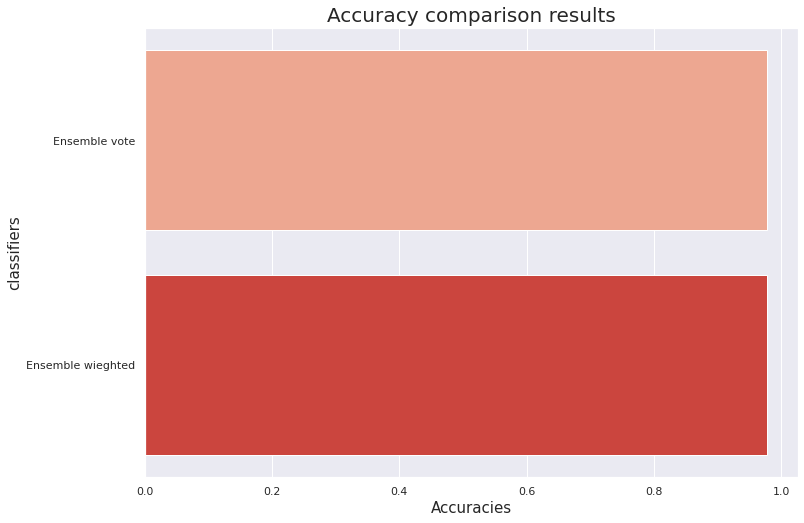

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(y="classifiers", x="Accuracies",data=accuracies.iloc[3:5,:], palette="Reds")

plt.ylabel("classifiers", fontsize = 15)
plt.xlabel("Accuracies", fontsize = 15)
plt.title("Accuracy comparison results", fontsize = 20) 
plt.show()

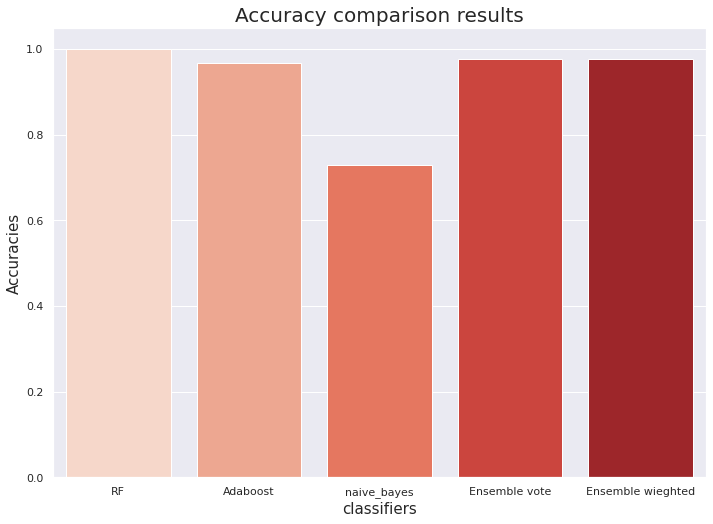

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="classifiers", y="Accuracies",data=accuracies, palette="Reds")

plt.xlabel("classifiers", fontsize = 15)
plt.ylabel("Accuracies", fontsize = 15)
plt.title("Accuracy comparison results", fontsize = 20) 
plt.show()